# Model Demonstration

Demonstrate the different models available in ``models.py``

Author: Max Bloor & Akhil Ahmed (models)

In [1]:
from Models import Models_env
import numpy as np 
import torch

In [2]:
#Global params
T = 26
nsteps = 26

#Simulate System
def sim(env,env_params): 
    input = env.generate_inputs()
    env.reset()
    SP_count = 0
    #Count the number of setpoints
    for k in env_params['SP'].keys():
        if env_params['SP'][k] is not None:
            SP_count +=1
    
    state = np.zeros((env_params['N'],env_params['Nx']+SP_count))
    rew = np.zeros(env_params['N'])
    
    #Open-loop Simulation
    for i in range(env_params['N']):
        state[i], rew[i], term, Trunc, _ = env.step(input[i])   
        if term:
            break
    #Plot
    env.plot_simulation_results(state,input)

## CSTR

In [1]:

#Enter required setpoints for each state. Enter None for states without setpoints.
SP = {
    '0': [0.8 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))],
    '1': [330 for i in range(int(nsteps/2))] + [320 for i in range(int(nsteps/2))],
}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([305]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.1,200,0.8,320]),
    'high' : np.array([4,400,0.9,330])  
}

cons = {
    '0':0.86,
}
env_params = {
    'Nx': 2, # Number of states
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'Nu':1, # Number of control/actions
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'dt': 1, # Time step
    'x0': torch.tensor([0.8,273,0.8,320]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'r_scale': torch.tensor([5,1/15]), #Scale the L1 norm used for reward (|x-x_sp|*r_scale)
    'done_on_cons_vio':False,
    'constraints': cons, 
    'r_penalty': 1000
}
env = Models_env(env_params)

sim(env,env_params)

NameError: name 'nsteps' is not defined

## First Order System

In [5]:
SP = {
}

action_space = {
    'low': np.array([0]),
    'high':np.array([10]) 
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 1,
    'N': nsteps,
    'tsim':T,
    'Nu':1,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0]),
    'model': 'first_order_system_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

KeyError: '0'

## Second Order System

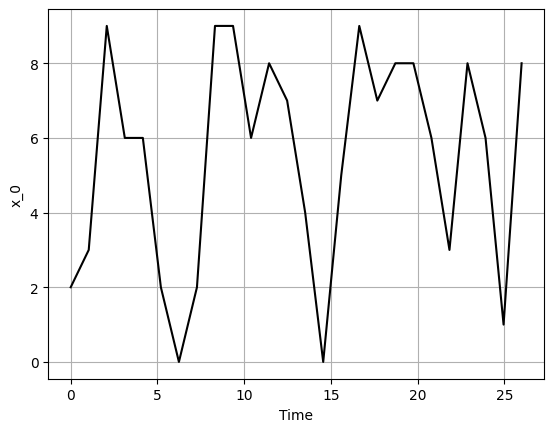

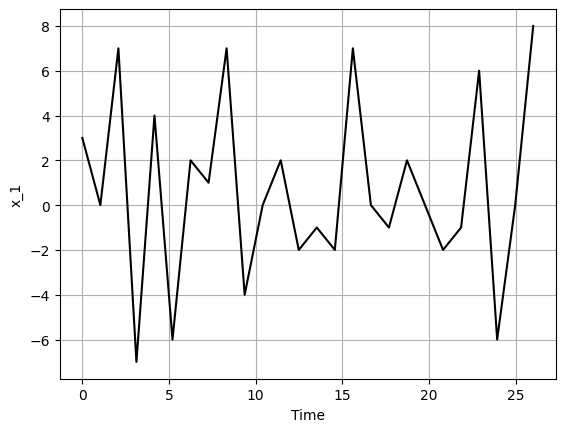

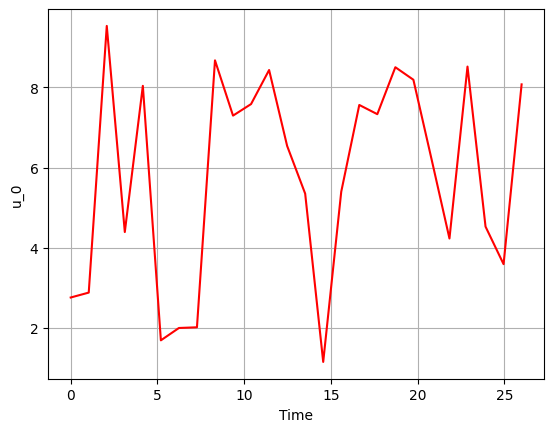

In [ ]:
SP = {'0':None
}

action_space = {
    'low': np.array([0]),
    'high':np.array([10]) 
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 2,
    'N': nsteps,
    'tsim':T,
    'Nu':1,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0,0]),
    'model': 'second_order_system_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Reactor-Separator-Recycle

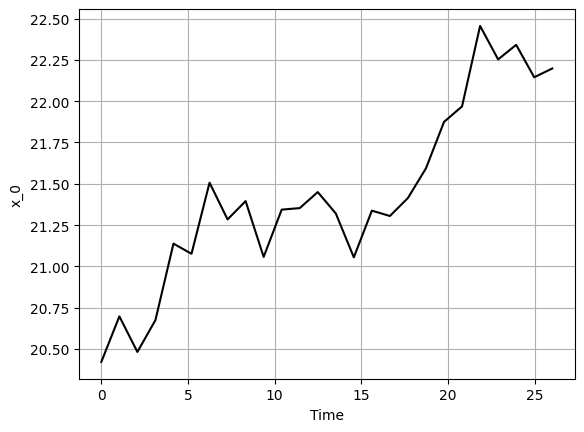

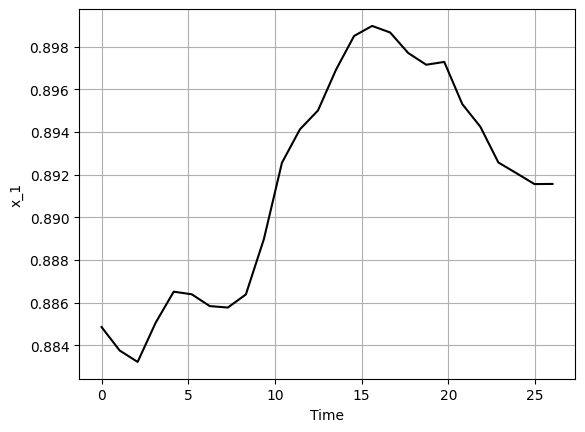

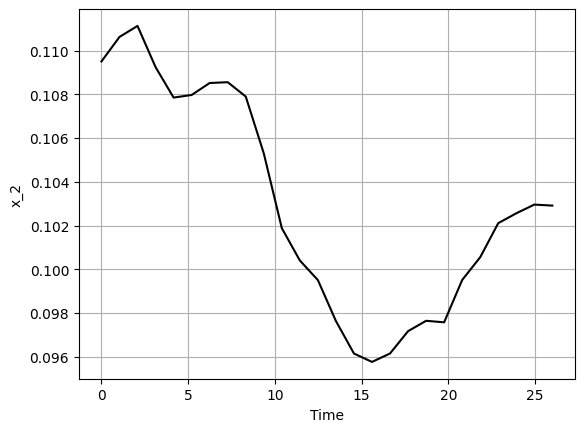

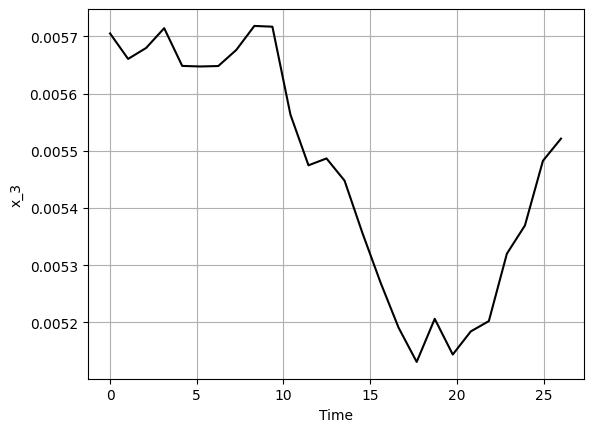

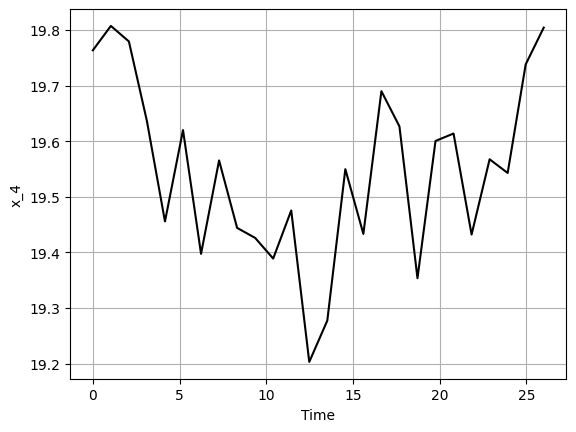

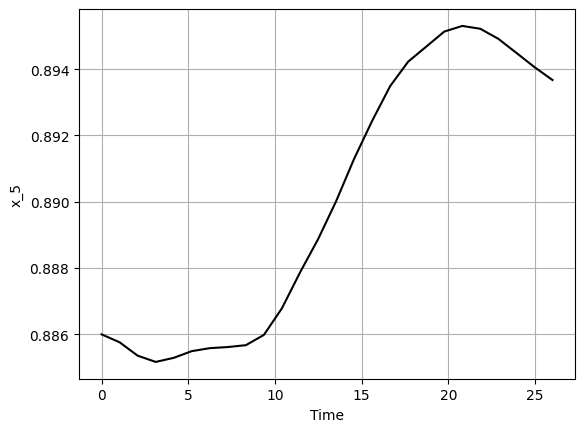

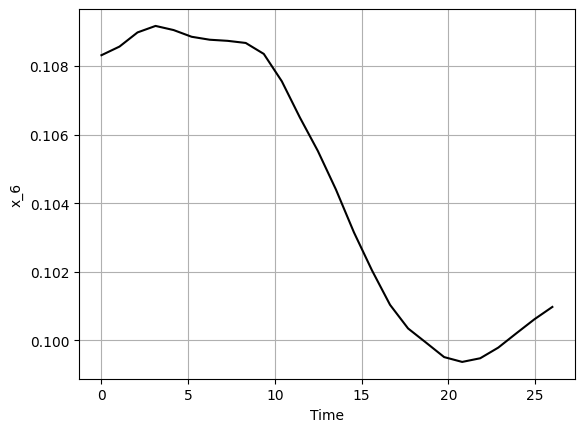

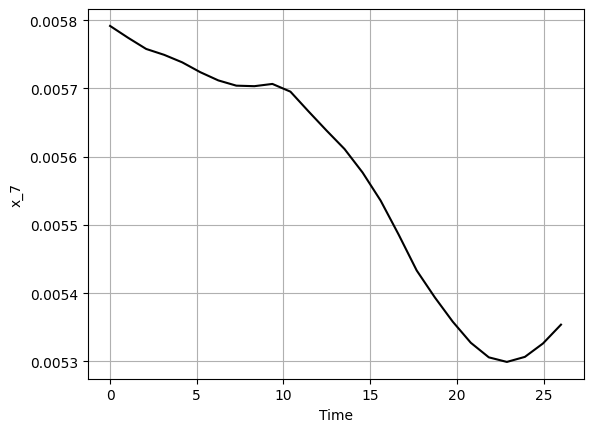

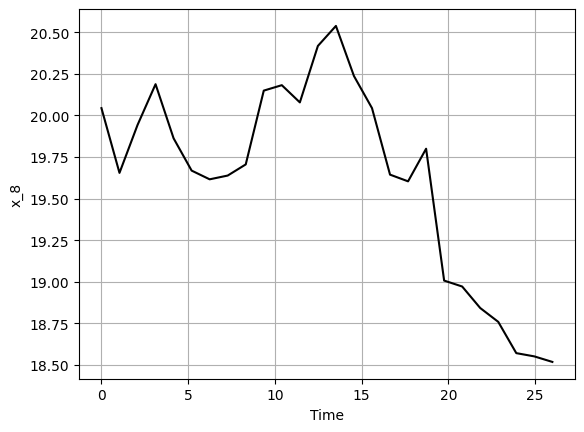

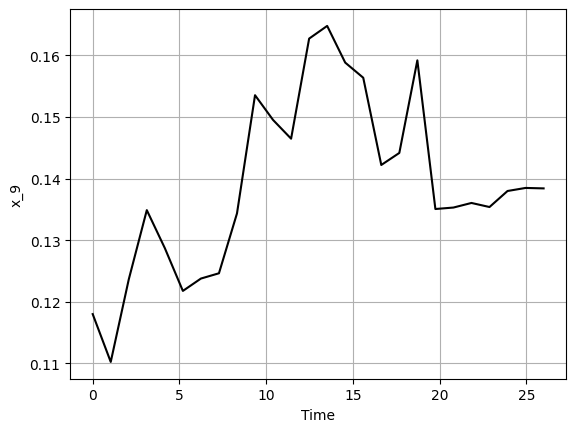

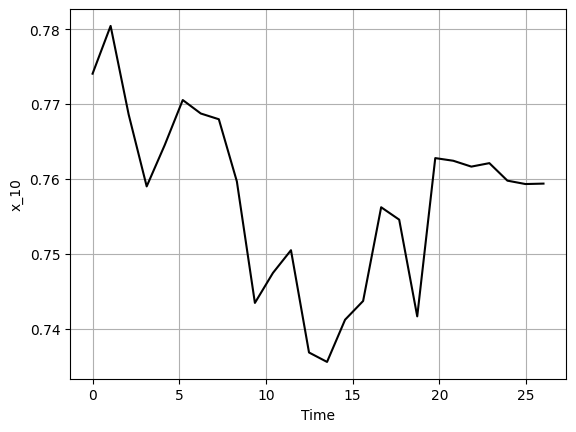

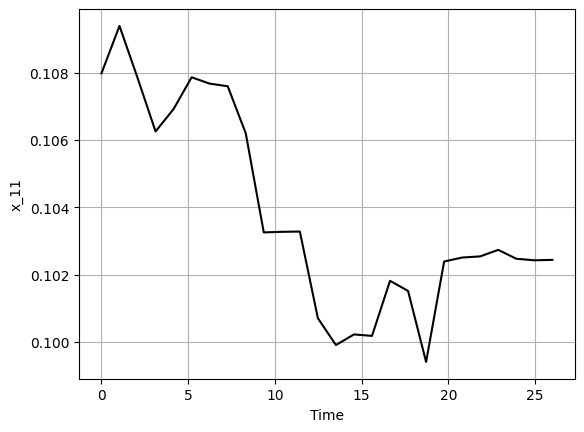

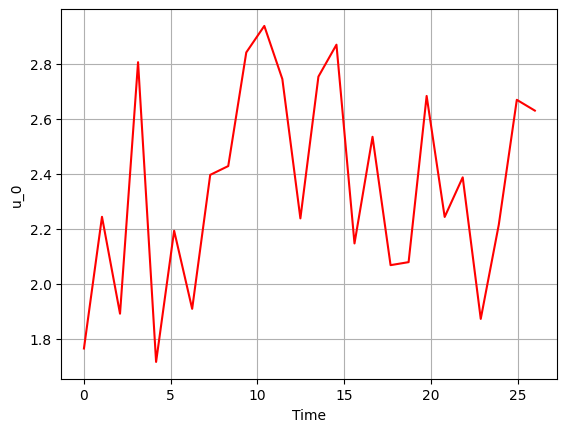

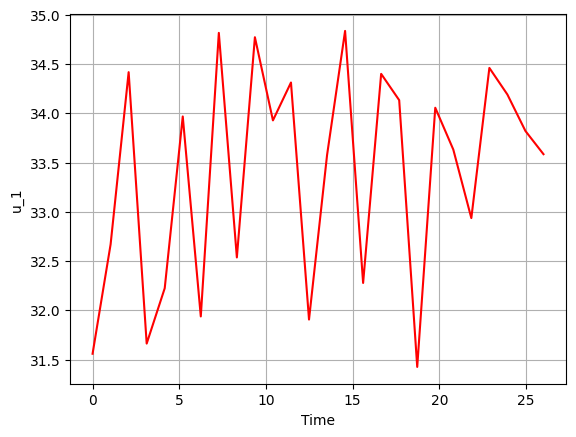

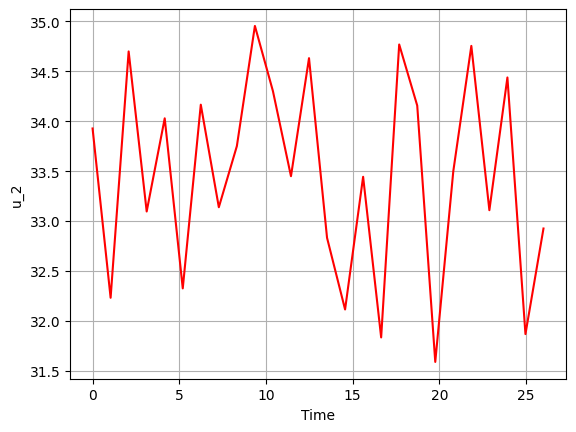

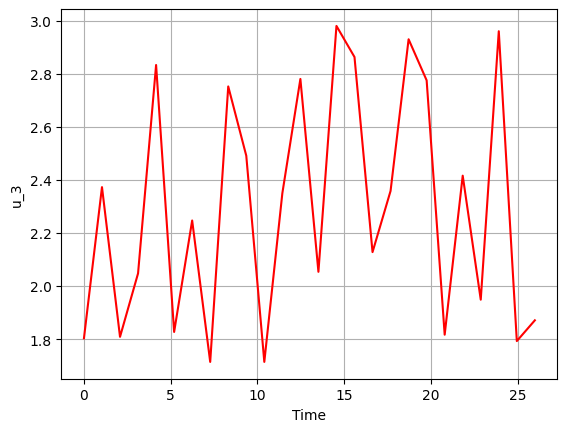

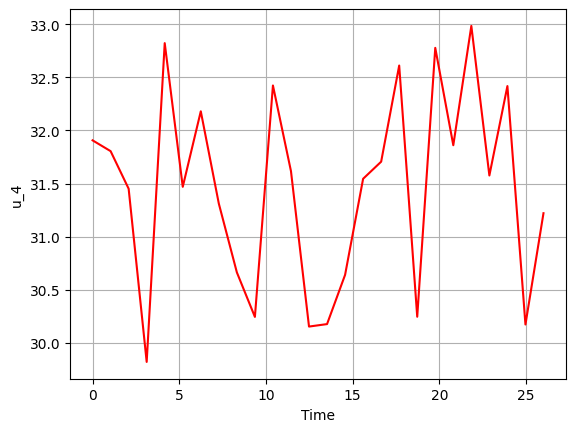

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5': None,
      '6':None,
      '7':None,
      '8': None,
      '9':None,
      '10':None,
      '11': None,
}

action_space = {
    'low': np.array([1.667, 31.33, 31.33, 1.667, 29.67]),
    'high':np.array([3, 35, 35, 3, 33])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 12,
    'N': nsteps,
    'tsim':T,
    'Nu':5,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([20, 0.8861, 0.1082, 0.0058, 20, 0.8861, 0.1082, 0.0058, 20, 0.1139, 0.7779, 0.1082]),
    'model': 'large_scale_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## CSTR Series recycle ode

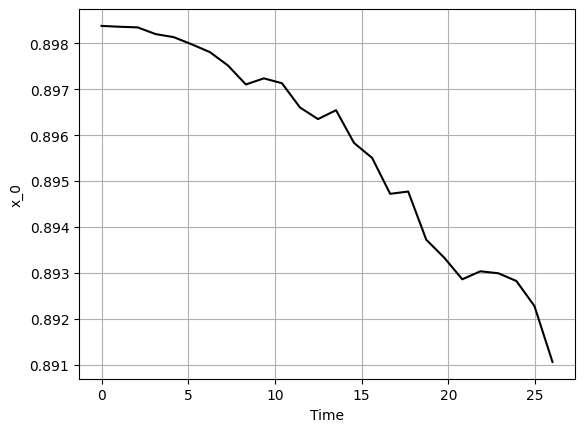

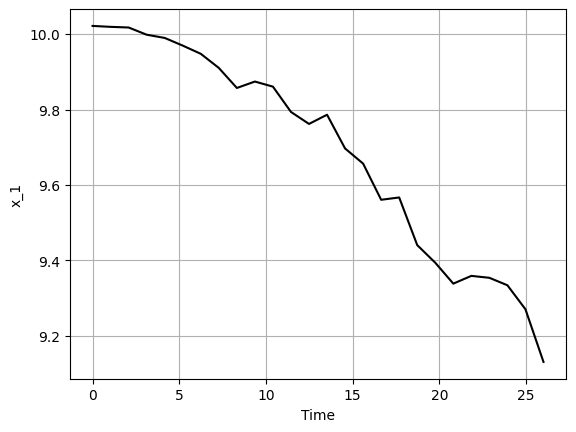

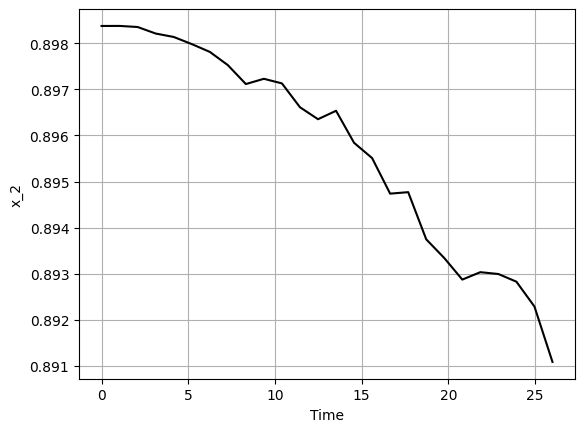

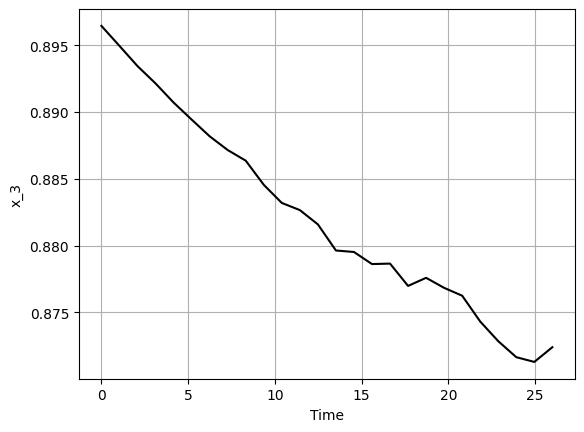

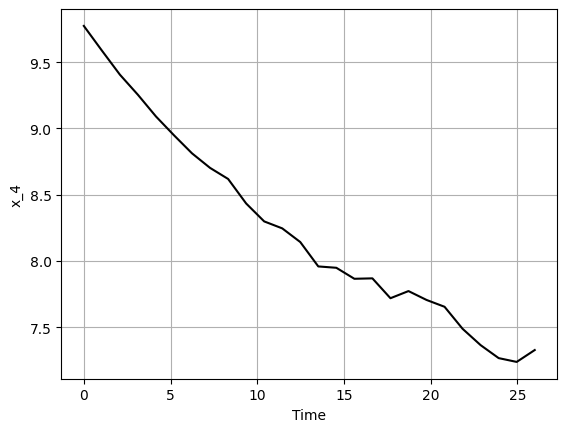

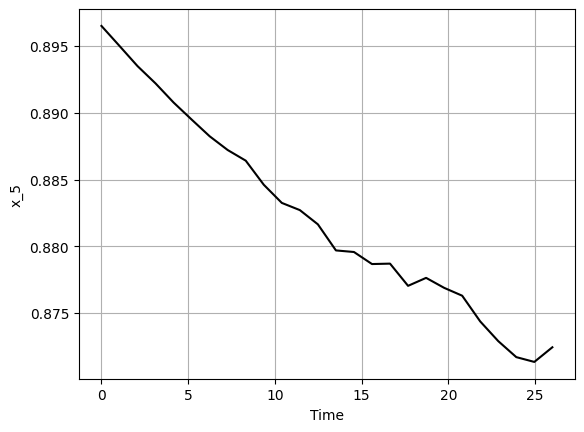

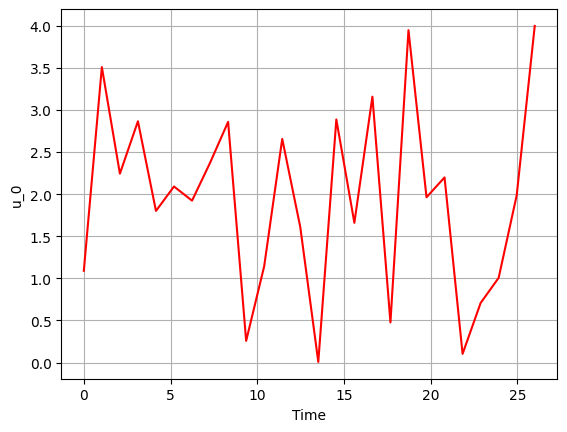

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5': None,
}

action_space = {
    'low': np.array([0]),
    'high':np.array([4])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 6,
    'N': nsteps,
    'tsim':T,
    'Nu':1,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0.9, 10.0, 0.9, 0.9, 10.0, 0.9]),
    'model': 'cstr_series_recycle_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## CSTR Series recycle ode #2

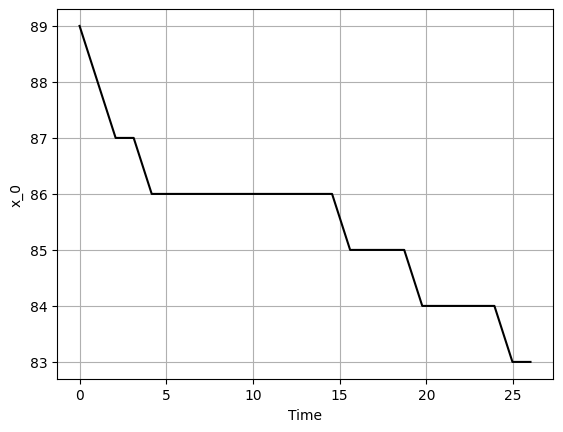

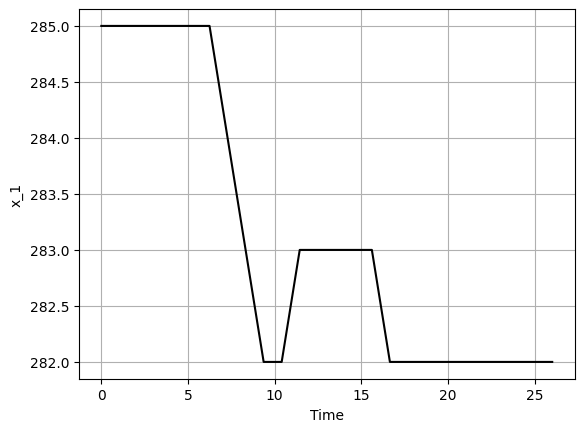

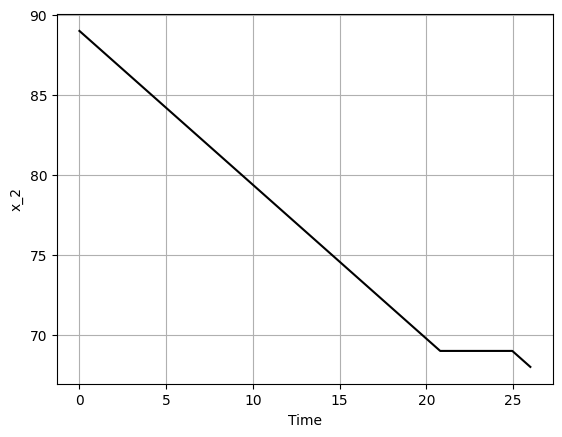

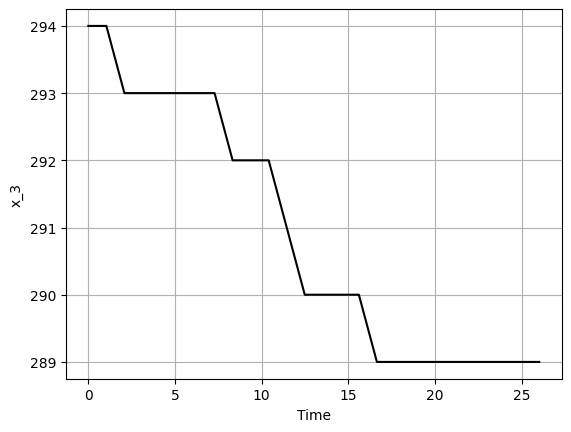

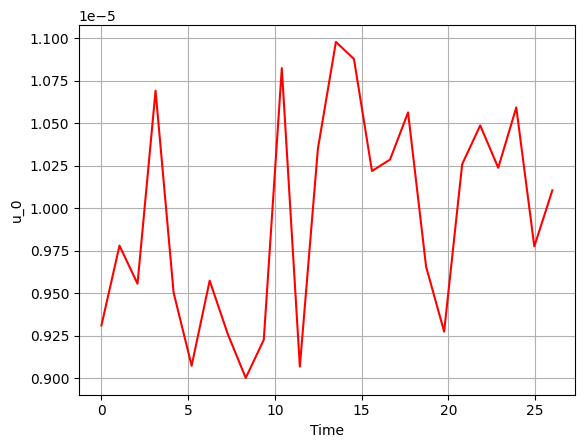

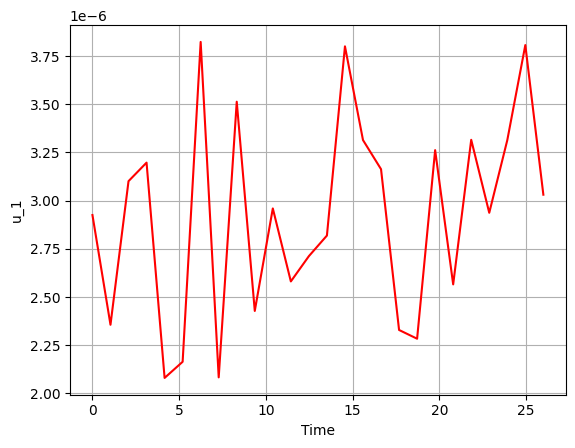

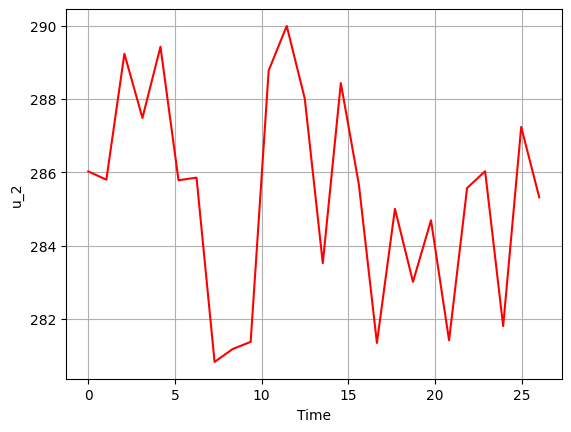

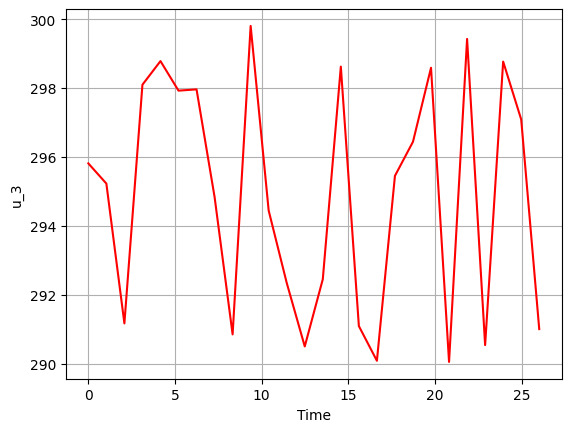

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
}

action_space = {
    'low': np.array([9e-6, 2e-6, 280, 290]),
    'high':np.array([11e-6, 4e-6, 290, 300])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 4,
    'N': nsteps,
    'tsim':T,
    'Nu':4,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([90, 285, 90, 294]),
    'model': 'cstr_series_recycle_two_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Distillation ODE

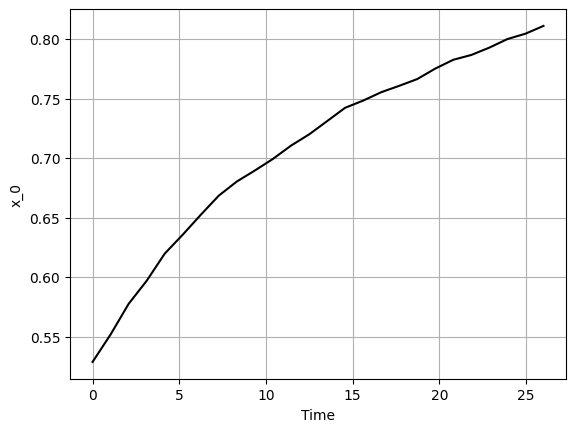

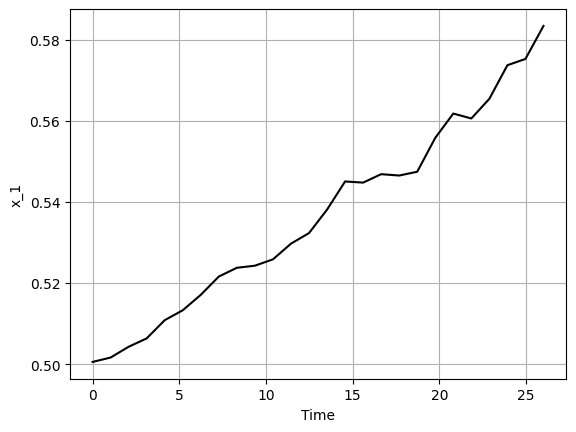

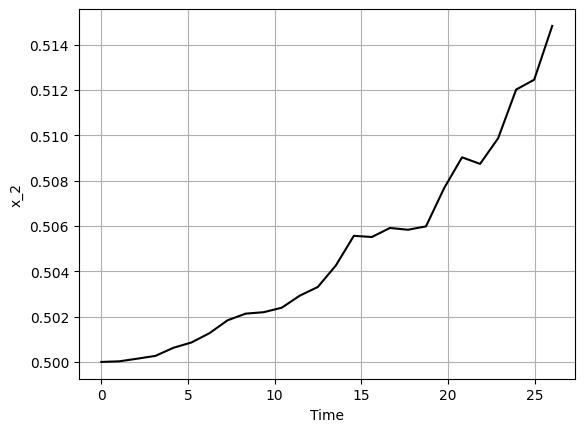

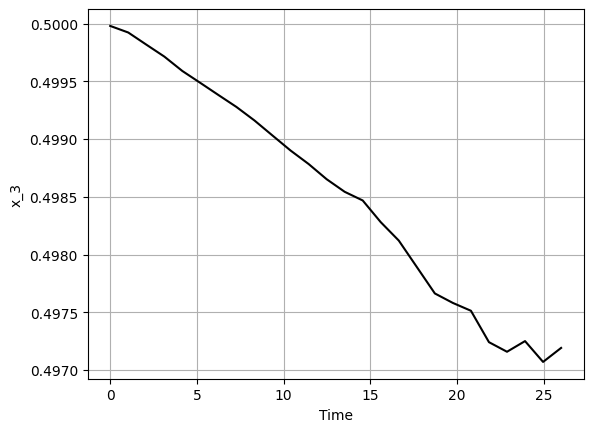

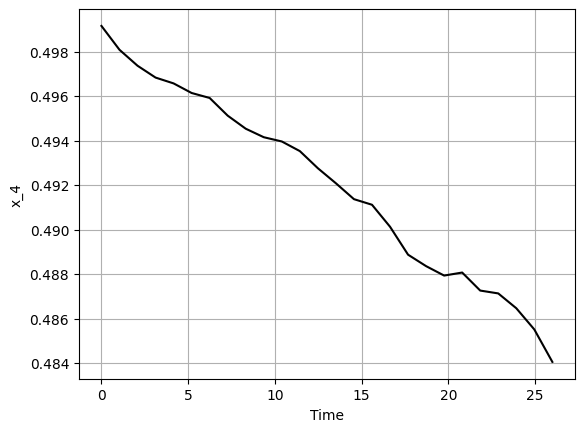

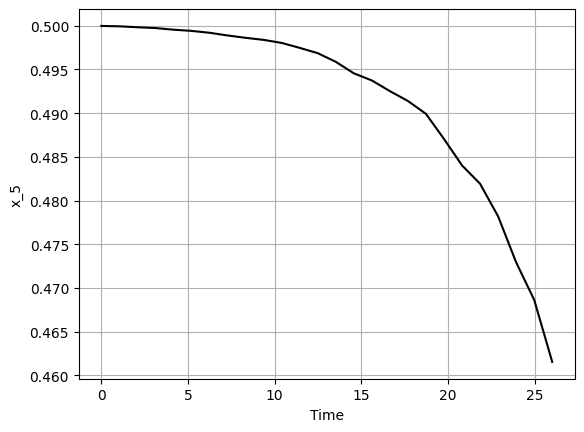

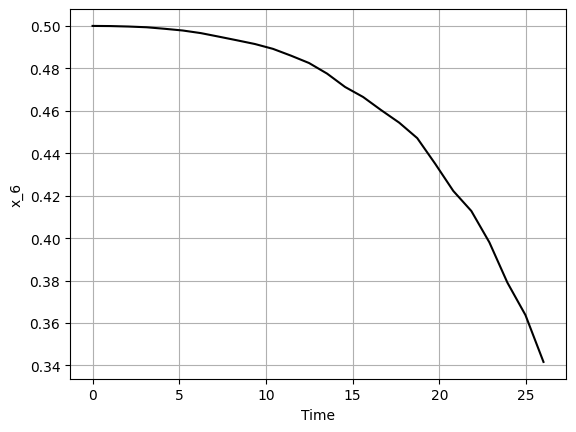

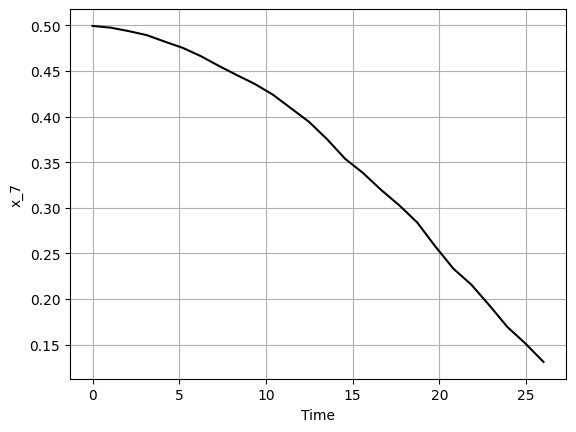

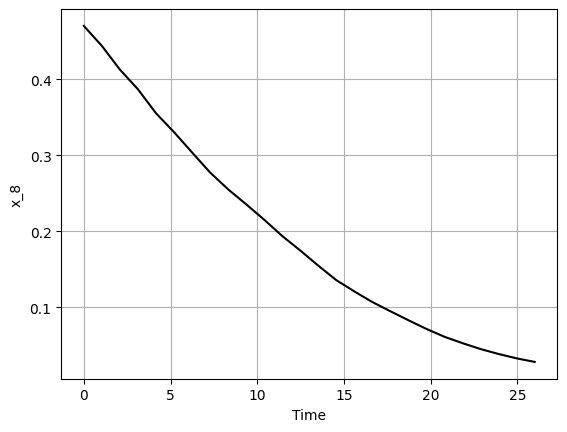

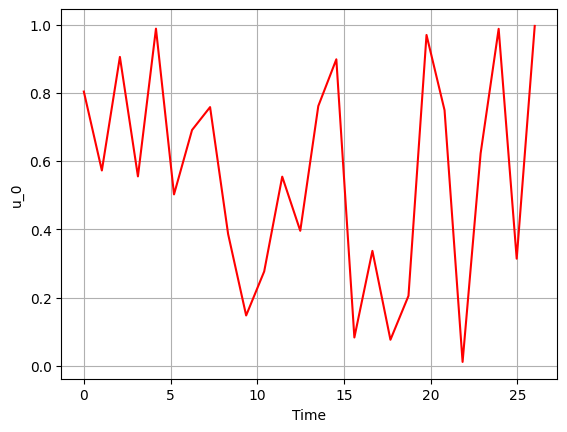

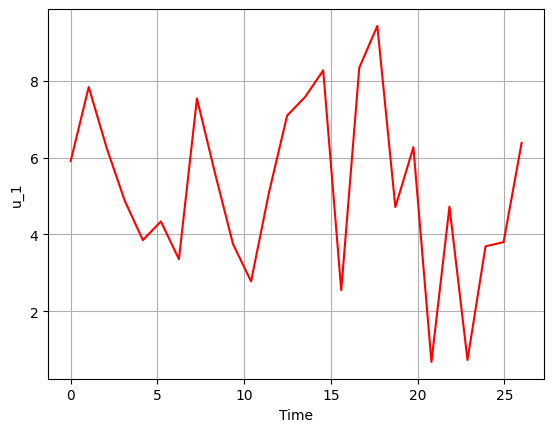

In [27]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5':None,
      '6': None,
      '7':None,
      '8': None
}

action_space = {
    'low': np.array([0,0]),
    'high':np.array([1,10])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 9,
    'N': nsteps,
    'tsim':T,
    'Nu':2,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
    'model': 'distillation_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Multistage Extraction ODE

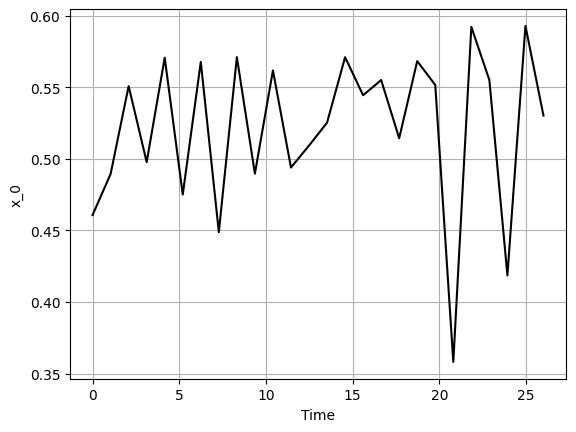

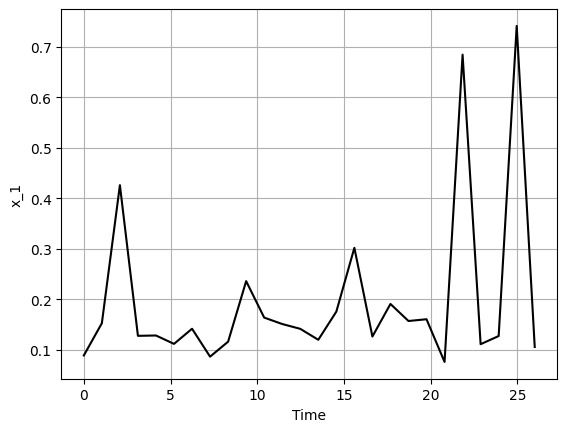

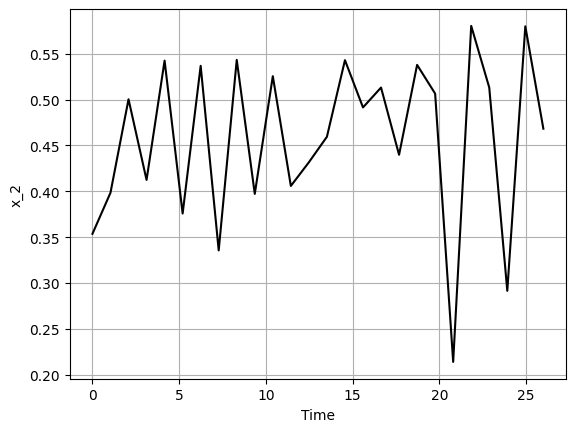

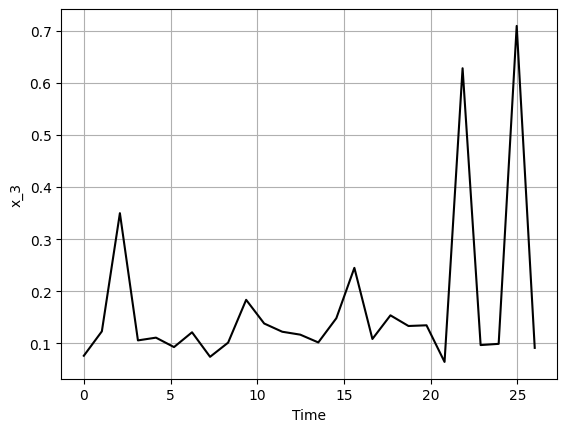

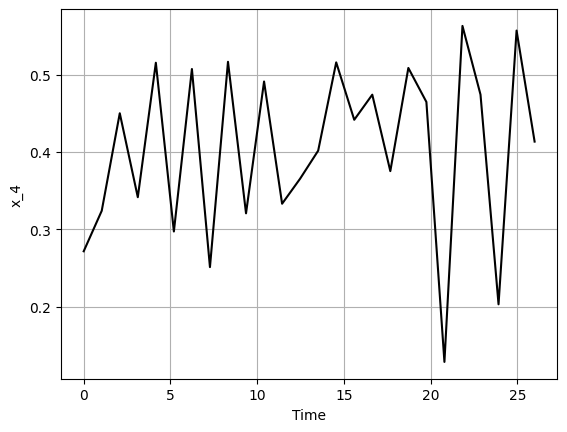

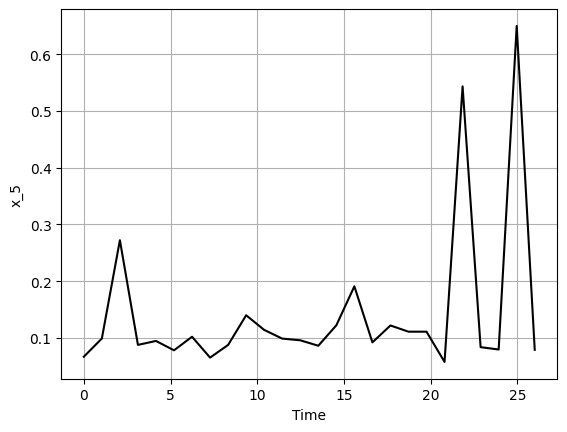

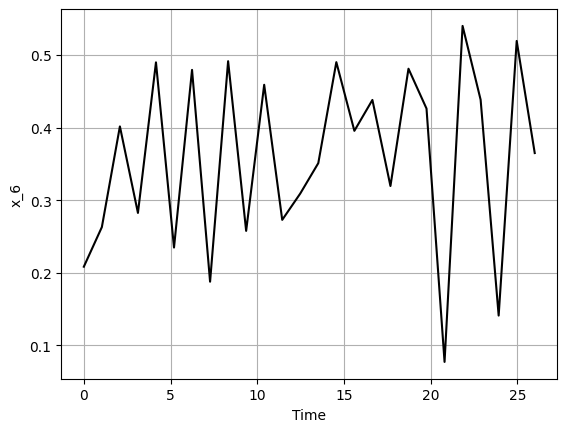

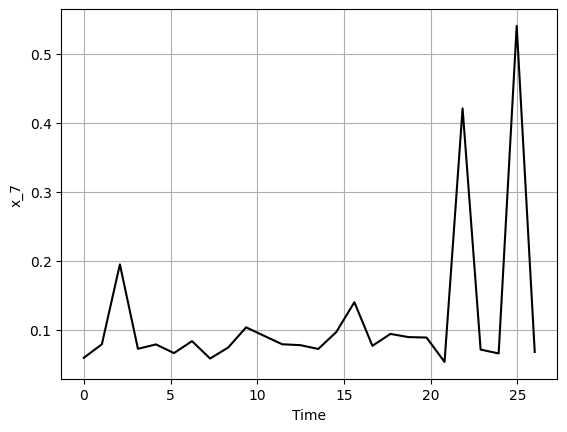

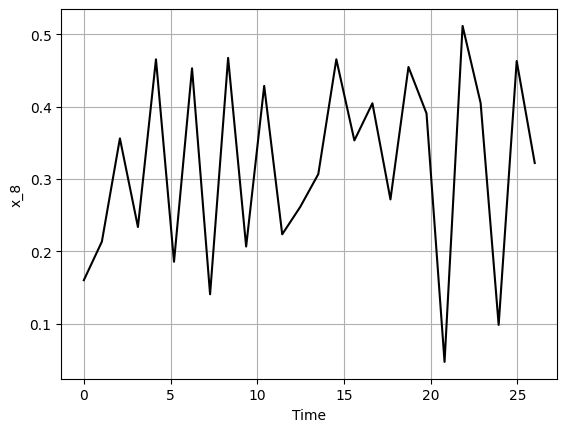

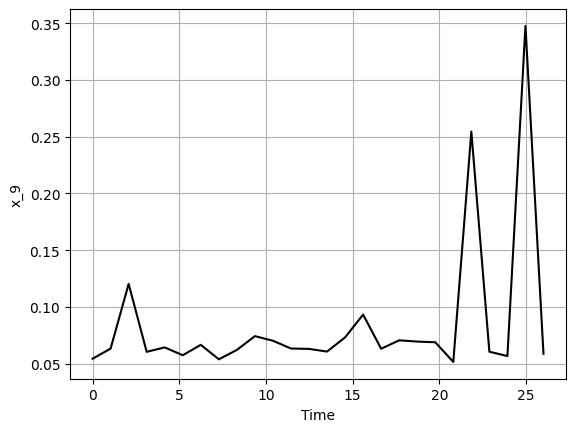

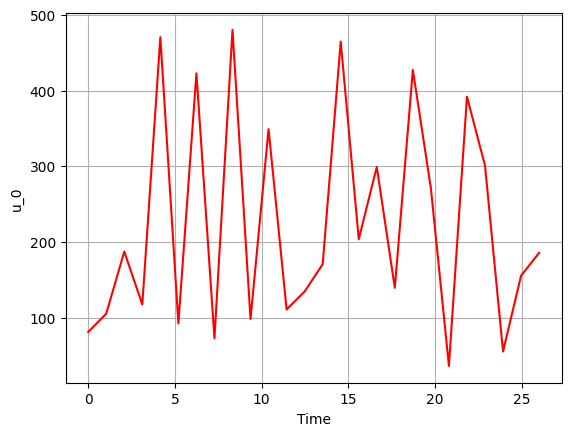

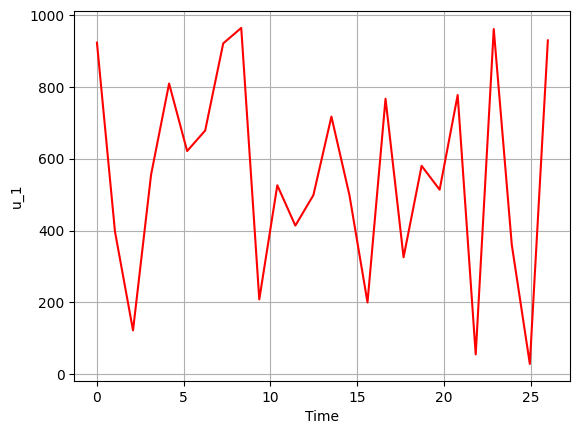

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5':None,
      '6': None,
      '7':None,
      '8': None,
      '9': None
}

action_space = {
    'low': np.array([5,10]),
    'high':np.array([500,1000])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 10,
    'N': nsteps,
    'tsim':T,
    'Nu':2,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0.55, 0.3, 0.45, 0.25, 0.4, 0.20, 0.35, 0.15, 0.25, 0.1]),
    'model': 'multistage_extraction_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Multistage Extraction Reactive ODE

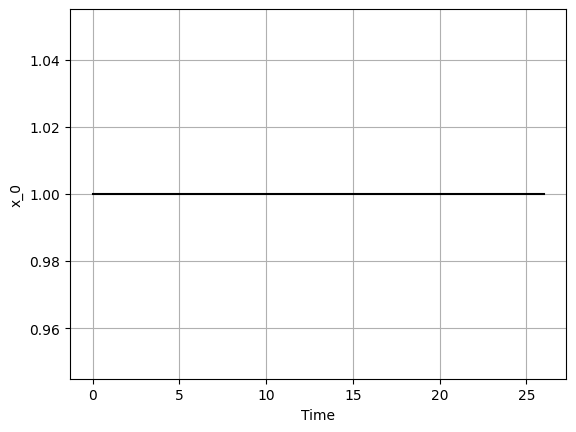

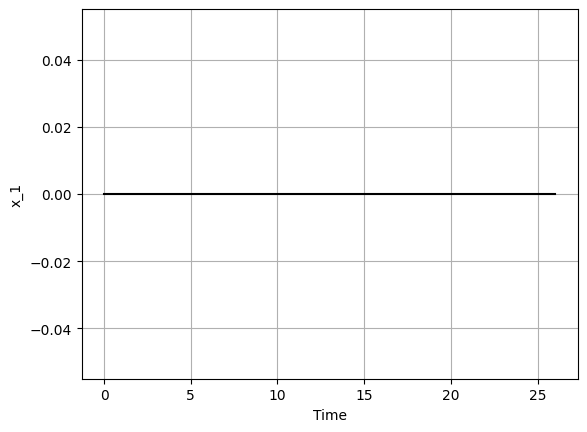

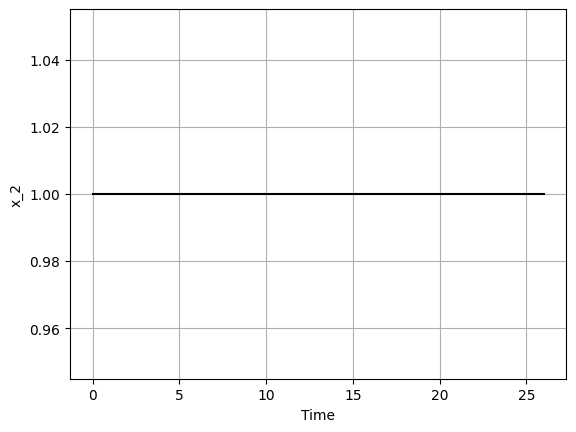

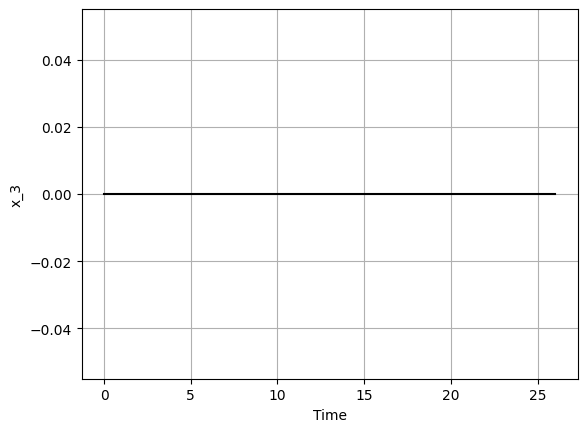

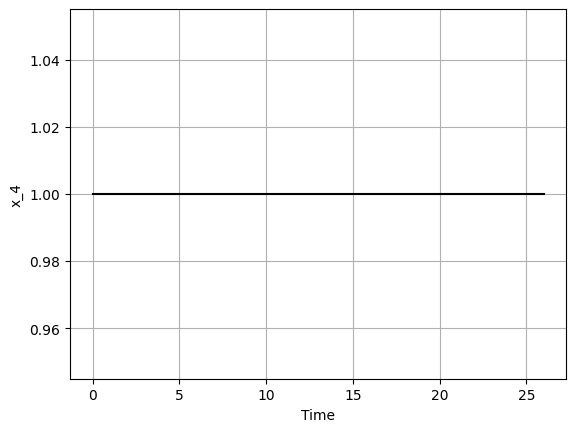

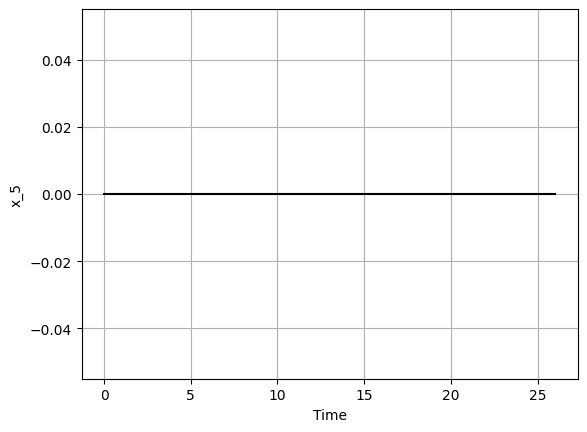

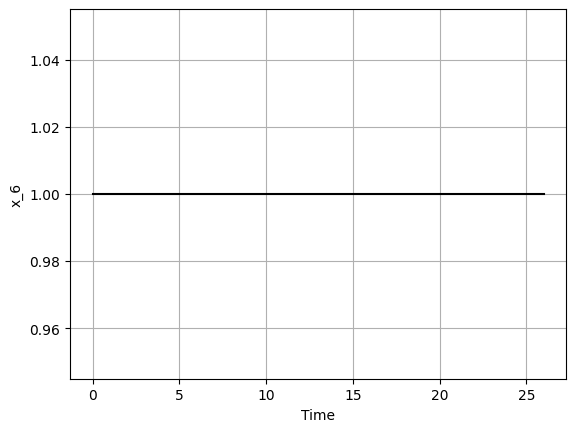

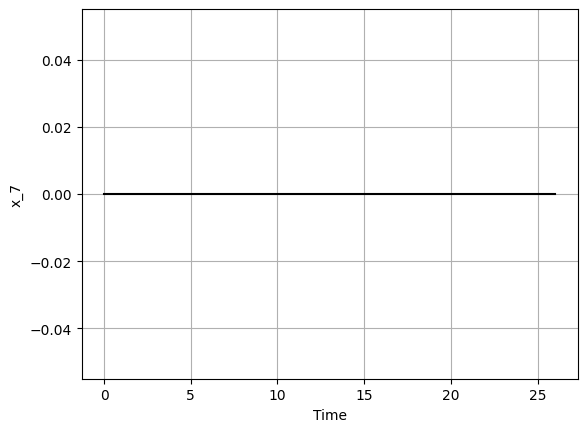

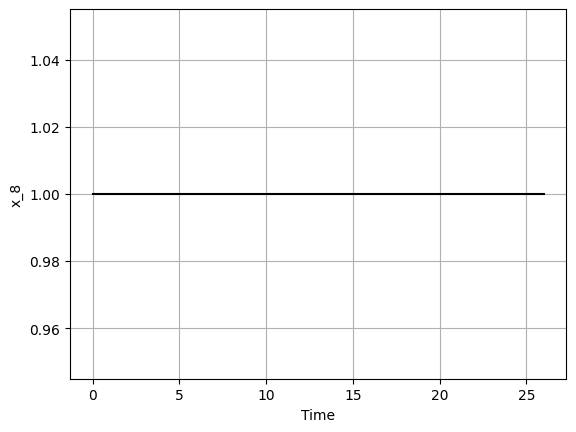

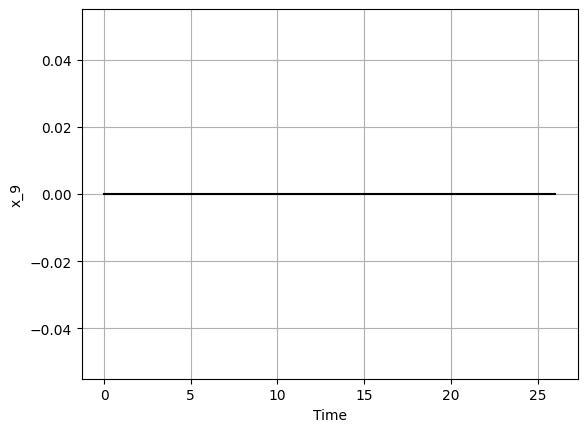

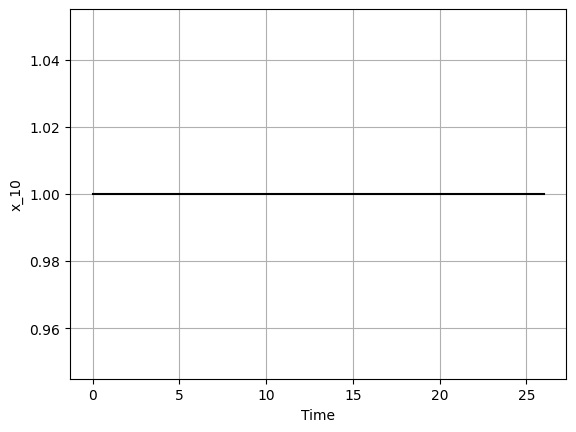

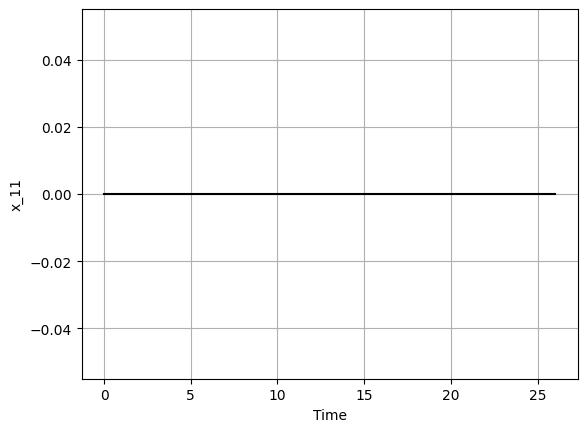

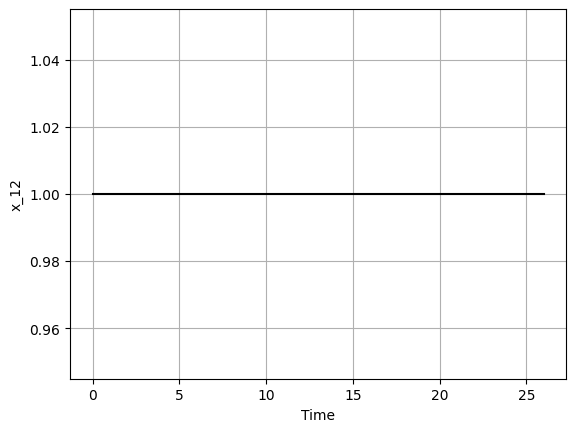

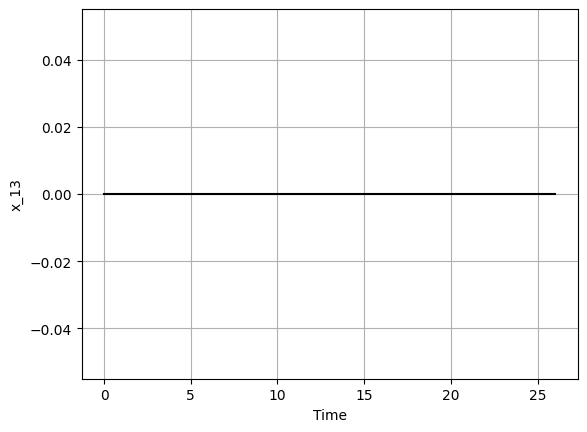

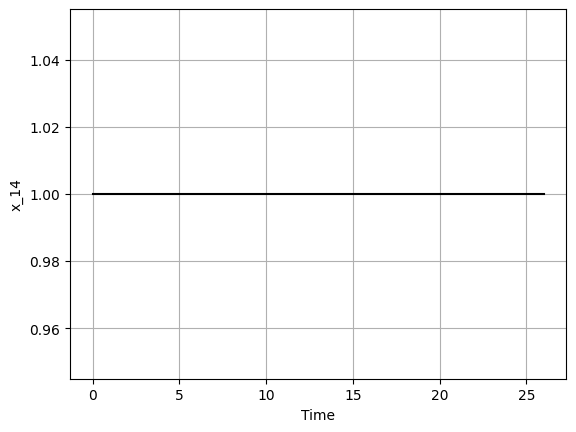

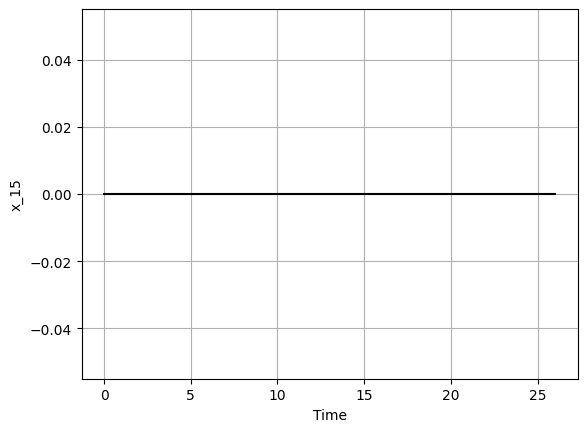

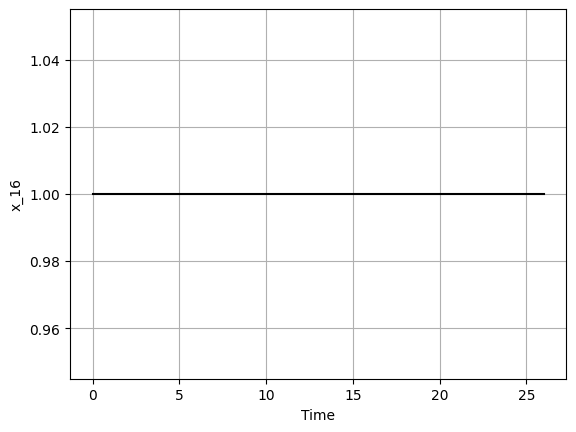

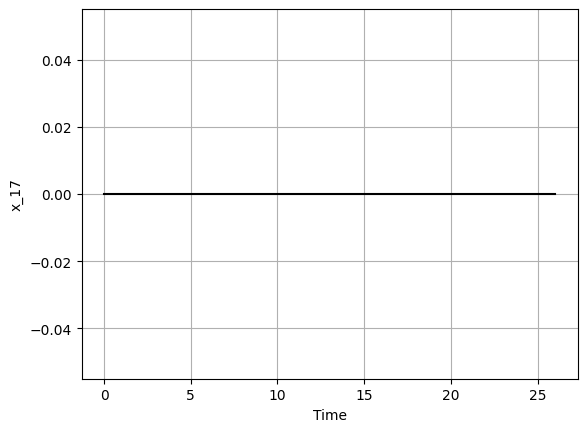

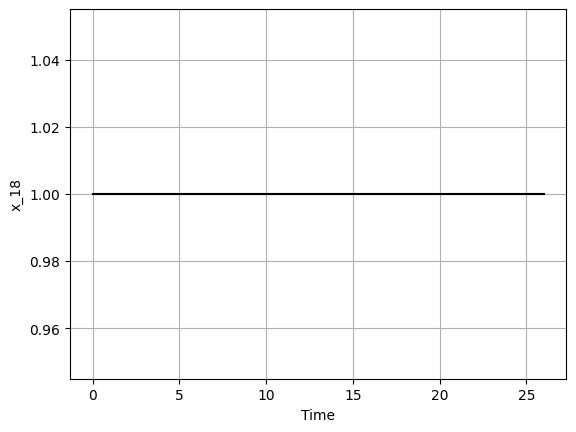

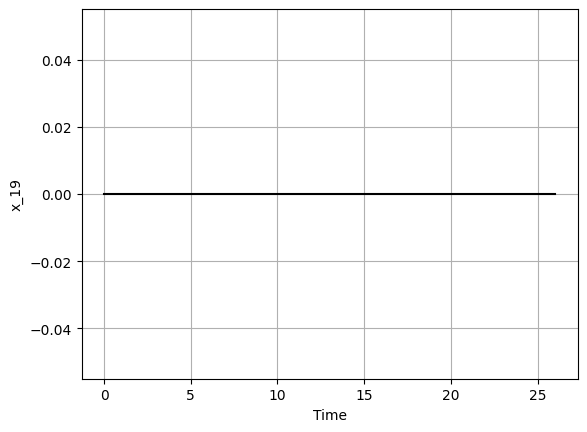

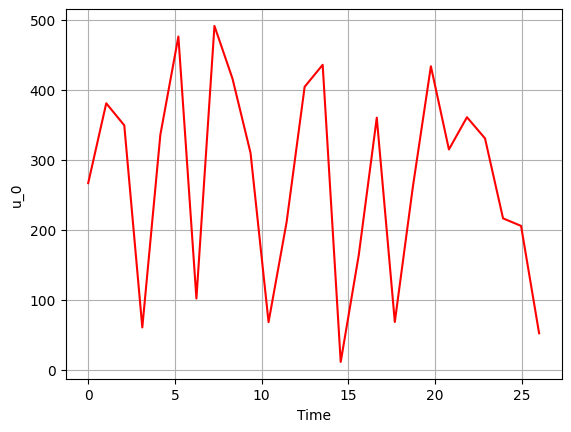

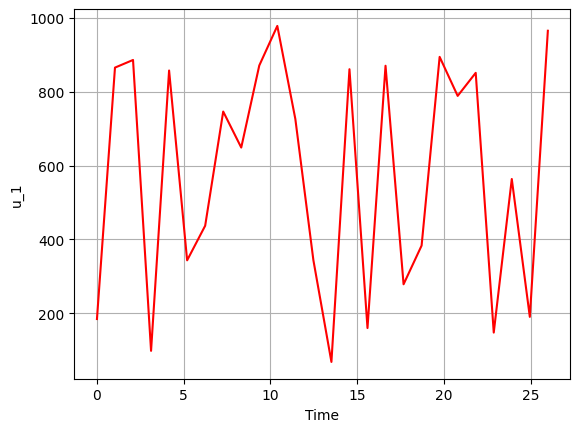

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5':None,
      '6': None,
      '7':None,
      '8': None,
      '9': None,
      '10':None,
      '11':None,
      '12': None,
      '13':None,
      '14':None,
      '15':None,
      '16': None,
      '17':None,
      '18': None,
      '19': None
}

action_space = {
    'low': np.array([5,10]),
    'high':np.array([500,1000])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 20,
    'N': nsteps,
    'tsim':T,
    'Nu':2,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0]*20),
    'model': 'multistage_extraction_reactive_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Heat Exchanger

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5':None,
      '6': None,
      '7':None,
      '8': None,
      '9': None,
      '10':None,
      '11':None,
      '12': None,
      '13':None,
      '14':None,
      '15':None,
      '16': None,
      '17':None,
      '18': None,
      '19': None,
      '20': None,
      '21':None,
      '22': None,
      '23': None,
      
}

action_space = {
    'low': np.array([1, 1, 350, 290]),
    'high':np.array([400]*4)
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 24,
    'N': nsteps,
    'tsim':T,
    'Nu':4,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([350, 320, 290]*8),
    'model': 'heat_ex_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Biofilm Reactor

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None,
      '4':None,
      '5':None,
      '6': None,
      '7':None,
      '8': None,
      '9': None,
      '10':None,
      '11':None,
      '12': None,
      '13':None,
      '14':None,
      '15':None,    
}

action_space = {
    'low': np.array([1, 1, 10, 10, 10]),
    'high':np.array([1, 1, 10, 10, 10])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 16,
    'N': nsteps,
    'tsim':T,
    'Nu':5,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0]*16),
    'model': 'biofilm_reactor_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Polymerisation ODE

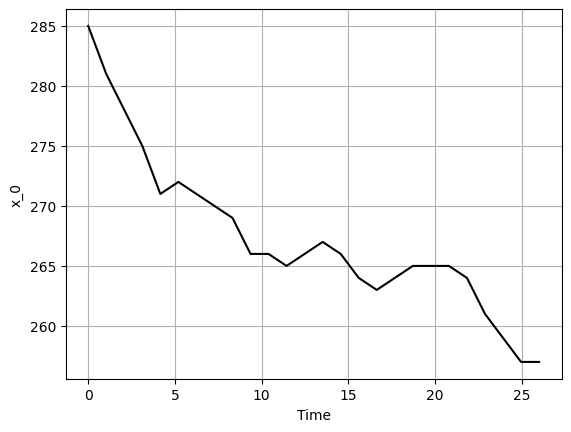

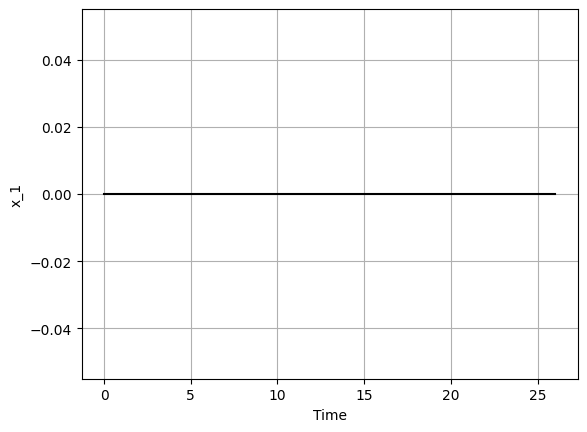

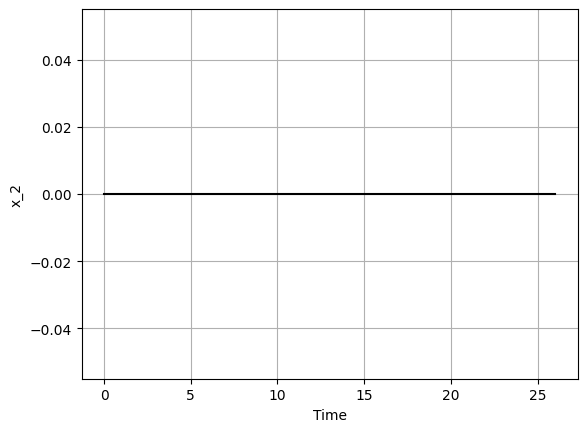

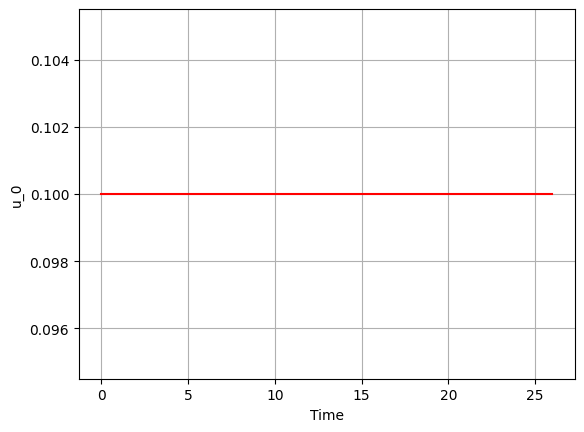

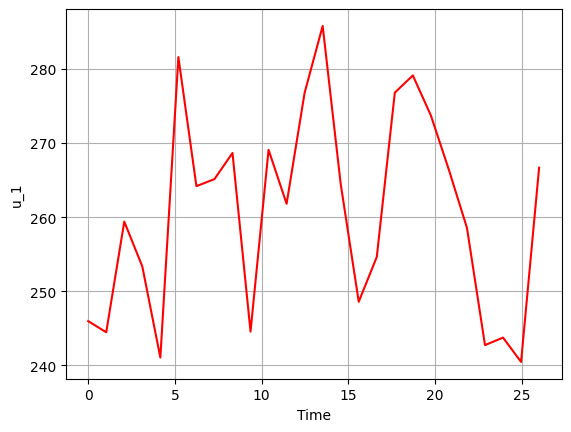

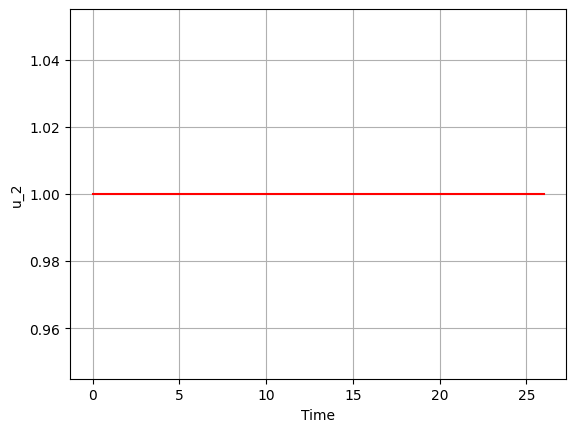

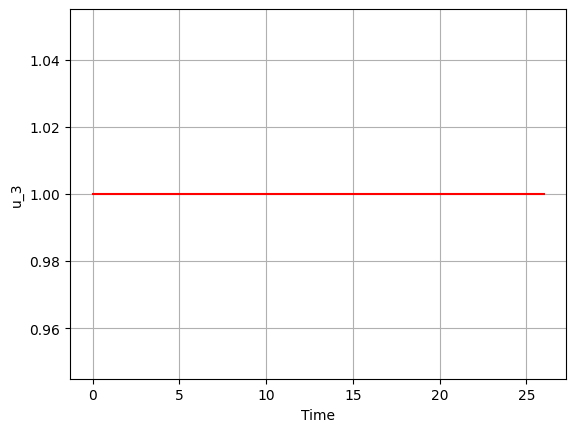

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
   
}

action_space = {
    'low': np.array([0.1, 240, 1, 1]),
    'high':np.array([0.1, 287, 1, 1])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 3,
    'N': nsteps,
    'tsim':T,
    'Nu':4,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([290, 0, 0]),
    'model': 'polymerisation_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)

## Four Tank ODE

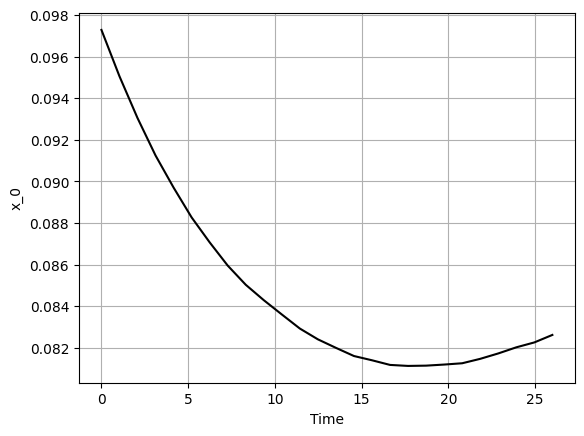

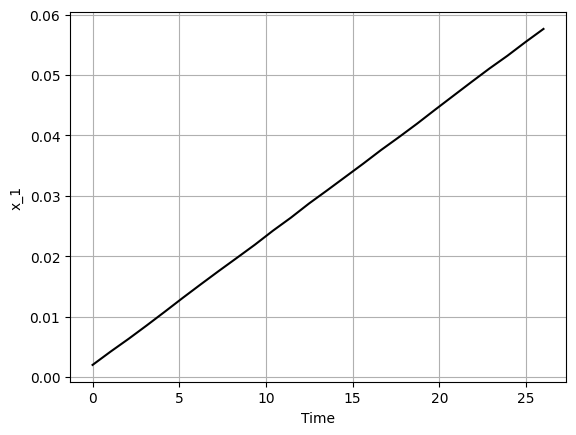

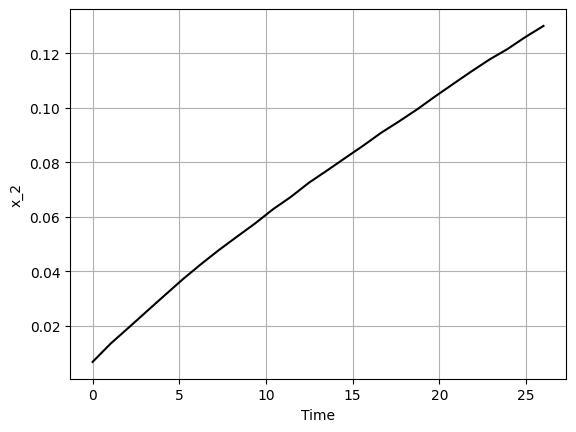

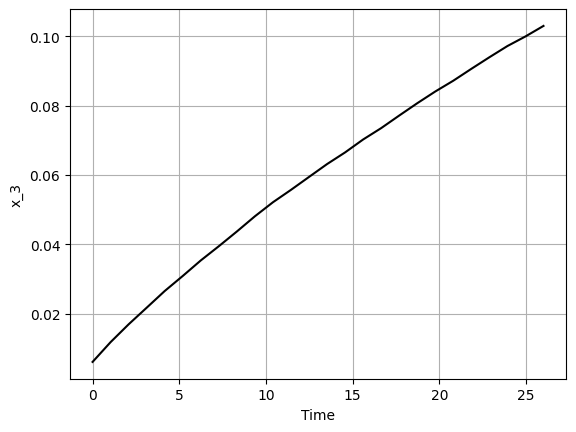

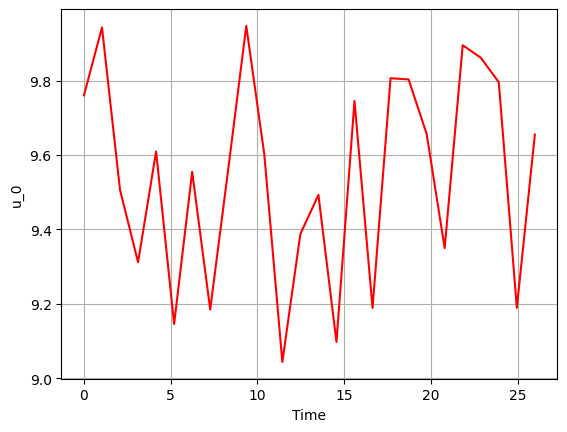

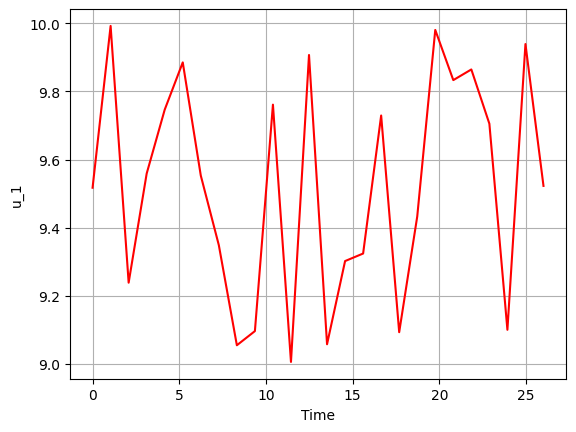

In [ ]:
SP = {'0':None,
      '1':None,
      '2': None,
      '3':None
   
}

action_space = {
    'low': np.array([9,9]),
    'high':np.array([10,10])
}

observation_space = {
    'low' : np.array([]),
    'high' : np.array([])  
}


env_params = {
    'Nx': 4,
    'N': nsteps,
    'tsim':T,
    'Nu':2,
    'SP':SP,
    'o_space' : observation_space,
    'a_space' : action_space,
    'dt': 1,
    'x0': torch.tensor([0.1, 0, 0, 0]),
    'model': 'four_tank_ode', 
    'r_scale': torch.tensor([])
}
env = Models_env(env_params)

sim(env,env_params)